In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

In [3]:
movie_gross = movie_gross_df
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(0)
movie_gross['studio'] = movie_gross['studio'].fillna('Unknown')
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(",","").astype(float)
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].astype(float)

In [4]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [21]:
###create a total gross column
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']

In [24]:
movie_gross.set_index('title',inplace=True)
movie_gross.head()

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [29]:
imdb_basics = imdb_basics_df
imdb_basics = imdb_basics.rename(columns = {'primary_title' : 'title'})
imdb_basics = imdb_basics.drop(['start_year'], axis =1)
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), object(4)
memory usage: 5.6+ MB


In [19]:
imdb_basics.set_index('title')

,tconst,original_title,start_year,runtime_minutes,genres
title,,,,,
Sunghursh,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
One Day Before the Rainy Season,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
The Other Side of the Wind,tt0069049,The Other Side of the Wind,2018,122.0,Drama
Sabse Bada Sukh,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
The Wandering Soap Opera,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
Kuambil Lagi Hatiku,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
Rodolpho Teóphilo - O Legado de um Pioneiro,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
Dankyavar Danka,tt9916706,Dankyavar Danka,2013,NaN,Comedy


In [31]:
movie_gross_and_basics = movie_gross.merge(imdb_basics,how = 'inner', on ='title')

In [32]:
movie_gross_and_basics.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,original_title,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi"


In [33]:
movie_gross_and_basics = movie_gross_and_basics.drop(['original_title'], axis = 1)

In [35]:
movie_gross_and_basics.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,tt1375666,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,tt0892791,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,tt1325004,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,tt1228705,124.0,"Action,Adventure,Sci-Fi"


<AxesSubplot:xlabel='runtime_minutes', ylabel='total_gross'>

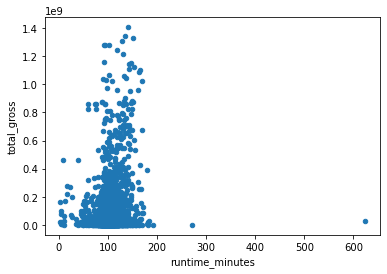

In [39]:
movie_gross_and_basics.plot('runtime_minutes', 'total_gross', kind = 'scatter')